# Cryptocurrency Market Analysis
(Clustering, Classification, Regression Analysis)

## Installing Required Libraries

In [56]:
!pip install scikit-learn
!pip install seaborn
!pip install mplfinance

## Importing Libraries and Modules

In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.dates as mdates
from datetime import datetime
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Merging files together and Ticker mapping 

In [59]:
# List of file names to merge
file_names = ['cleaned_BNB.csv', 'cleaned_BTC.csv', 'cleaned_DOGE.csv', 'cleaned_ETH.csv', 'cleaned_USDT.csv', 'cleaned_XRP.csv']


# Create an empty DataFrame to store the merged data
merged_data = pd.DataFrame()
temp_df = pd.DataFrame()

# Mapping dictionary for ticker values
ticker_mapping = {'BNB': 1, 'BTC': 2, 'DOGE': 3, 'ETH': 4, 'USDT': 5, 'XRP': 6}


# Loop through each file and merge the data
for file in file_names:
    # Read the file into a DataFrame
    data = pd.read_csv(file)
    
    #
    temp_df = pd.concat([temp_df, data], ignore_index=True)
    
    # Map the 'ticker' values using the mapping dictionary
    data['ticker'] = data['ticker'].map(ticker_mapping)
    
    # Append the data to the merged_data DataFrame
    merged_data = pd.concat([merged_data, data], ignore_index=True)
    
    
#print(merged_data)
#merged_data.head(20)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ticker               10935 non-null  int64  
 1   date                 10935 non-null  object 
 2   open                 10935 non-null  float64
 3   high                 10935 non-null  float64
 4   low                  10935 non-null  float64
 5   close                10935 non-null  float64
 6   Daily_Return         10935 non-null  float64
 7   Volatility           10935 non-null  float64
 8   volatility_category  10935 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 769.0+ KB


### Date Conversion

In [60]:
# Convert the 'date' column to datetime format
merged_data['date'] = pd.to_datetime(merged_data['date'])

merged_data.info()

# Save the merged data to a Backup file
merged_data.to_csv('final01_data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ticker               10935 non-null  int64         
 1   date                 10935 non-null  datetime64[ns]
 2   open                 10935 non-null  float64       
 3   high                 10935 non-null  float64       
 4   low                  10935 non-null  float64       
 5   close                10935 non-null  float64       
 6   Daily_Return         10935 non-null  float64       
 7   Volatility           10935 non-null  float64       
 8   volatility_category  10935 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 769.0+ KB


### Converting Volatility Category to Numeric

In [61]:
# Mapping dictionary for volatility categories
volatility_category_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}

# Replace categorical values with numeric representations
merged_data['volatility_category_numeric'] = merged_data['volatility_category'].map(volatility_category_mapping)

#Dropping volatility_category column
merged_data = merged_data.drop(columns=['volatility_category'])

#merged_data.head(20)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ticker                       10935 non-null  int64         
 1   date                         10935 non-null  datetime64[ns]
 2   open                         10935 non-null  float64       
 3   high                         10935 non-null  float64       
 4   low                          10935 non-null  float64       
 5   close                        10935 non-null  float64       
 6   Daily_Return                 10935 non-null  float64       
 7   Volatility                   10935 non-null  float64       
 8   volatility_category_numeric  10935 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 769.0 KB


### Creating One Single File

In [62]:
# Save the merged data to a new file
merged_data.to_csv('final_data.csv', index=False)

In [63]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ticker                       10935 non-null  int64         
 1   date                         10935 non-null  datetime64[ns]
 2   open                         10935 non-null  float64       
 3   high                         10935 non-null  float64       
 4   low                          10935 non-null  float64       
 5   close                        10935 non-null  float64       
 6   Daily_Return                 10935 non-null  float64       
 7   Volatility                   10935 non-null  float64       
 8   volatility_category_numeric  10935 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 769.0 KB


In [64]:
merged_data.head()

,ticker,date,open,high,low,close,Daily_Return,Volatility,volatility_category_numeric
0,1,2019-01-01,6.06,6.67,5.00,5.95,-0.018152,0.075322,2
1,1,2019-01-02,5.95,6.09,4.56,6.07,0.020168,0.074717,2
2,1,2019-01-03,6.07,6.11,5.81,5.84,-0.037891,0.070874,2
3,1,2019-01-04,5.84,6.01,5.78,5.95,0.018836,0.070200,2
4,1,2019-01-05,5.95,6.12,5.94,5.99,0.006723,0.061406,2


In [65]:
# Load the file
df = pd.read_csv('final_data.csv')

### Creating separate DataFrame for each task

In [66]:
# DataFrame for Clustering
clustering_df = df.copy()

# DataFrame for Classification
classification_df = df.copy()

# DataFrame for Regression
regression_df = df.copy()

### Feature Scaling: Normalization (StandardScaler)

In [67]:
#Columns to be normalized (only continuous numerical)
columns_to_normalize = ['open', 'high', 'low', 'close', 'Daily_Return', 'Volatility']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform the specified columns
clustering_df[columns_to_normalize] = scaler.fit_transform(clustering_df[columns_to_normalize])
classification_df[columns_to_normalize] = scaler.fit_transform(classification_df[columns_to_normalize])
regression_df[columns_to_normalize] = scaler.fit_transform(regression_df[columns_to_normalize])

In [68]:
#To check old data
df.head()

,ticker,date,open,high,low,close,Daily_Return,Volatility,volatility_category_numeric
0,1,2019-01-01,6.06,6.67,5.00,5.95,-0.018152,0.075322,2
1,1,2019-01-02,5.95,6.09,4.56,6.07,0.020168,0.074717,2
2,1,2019-01-03,6.07,6.11,5.81,5.84,-0.037891,0.070874,2
3,1,2019-01-04,5.84,6.01,5.78,5.95,0.018836,0.070200,2
4,1,2019-01-05,5.95,6.12,5.94,5.99,0.006723,0.061406,2


In [69]:
#Date type conversion
clustering_df['date'] = pd.to_datetime(clustering_df['date'])

clustering_df.head() #To drop ticker and volatility_category_numeric
#clustering_df.info()

,ticker,date,open,high,low,close,Daily_Return,Volatility,volatility_category_numeric
0,1,2019-01-01,-0.389416,-0.389321,-0.389879,-0.389563,-0.383671,0.995113,2
1,1,2019-01-02,-0.389426,-0.389372,-0.389919,-0.389552,0.331412,0.979283,2
2,1,2019-01-03,-0.389415,-0.389370,-0.389804,-0.389572,-0.752027,0.878821,2
3,1,2019-01-04,-0.389436,-0.389379,-0.389807,-0.389563,0.306548,0.861206,2
4,1,2019-01-05,-0.389426,-0.389369,-0.389792,-0.389559,0.080509,0.631294,2


In [70]:
clustering_df.tail()

,ticker,date,open,high,low,close,Daily_Return,Volatility,volatility_category_numeric
10930,6,2023-12-24,-0.389903,-0.389848,-0.390283,-0.390040,-0.319130,-0.482760,1
10931,6,2023-12-25,-0.389903,-0.389847,-0.390283,-0.390037,0.967667,-0.417768,1
10932,6,2023-12-26,-0.389900,-0.389847,-0.390283,-0.390039,-0.714580,-0.390244,1
10933,6,2023-12-27,-0.389903,-0.389847,-0.390282,-0.390038,0.317431,-0.401707,1
10934,6,2023-12-28,-0.389901,-0.389846,-0.390281,-0.390038,-0.013093,-0.405852,1


In [71]:
# New dataframe to sort values

year = [2022, 2023]
clustering_df = clustering_df[clustering_df['date'].dt.year.isin(year)]

In [72]:
# Group by 'Category' and calculate mean values
temp_df = temp_df.groupby('ticker').mean().reset_index()
#temp_df = temp_df.drop('index', axis=1)

temp_df.head()

C:\Users\Varad\AppData\Local\Temp\ipykernel_38128\1789871392.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_df = temp_df.groupby('ticker').mean().reset_index()


,ticker,open,high,low,close,Daily_Return,Volatility
0,BNB,201.666747,207.826054,195.070027,201.842320,0.003442,0.043375
1,BTC,24536.025628,25135.225178,23893.954591,24558.227937,0.001920,0.032114
2,DOGE,0.076414,0.080437,0.072403,0.076464,0.004816,0.058706
3,ETH,1406.474916,1448.297608,1360.362656,1407.741437,0.002541,0.041001
4,USDT,1.000695,1.002856,0.999417,1.000694,0.000002,0.001144


### Cosine Similarity based Matrix

In [73]:
# Select the features for similarity calculation Hannan code
features_for_similarity = temp_df[columns_to_normalize]

# Calculate the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(features_for_similarity)

# Print or save the cosine similarity matrix as needed
print(cosine_sim_matrix)

[[1.         0.99998996 0.93313773 0.99999994 0.99977566 0.9988376 ]
 [0.99998996 1.         0.93302812 0.99999102 0.9998604  0.99879813]
 [0.93313773 0.93302812 1.         0.93310052 0.93280327 0.94931661]
 [0.99999994 0.99999102 0.93310052 1.         0.9997807  0.99883174]
 [0.99977566 0.9998604  0.93280327 0.9997807  1.         0.99852089]
 [0.9988376  0.99879813 0.94931661 0.99883174 0.99852089 1.        ]]


In [74]:
print(cosine_sim_matrix[:100, :100])

[[1.         0.99998996 0.93313773 0.99999994 0.99977566 0.9988376 ]
 [0.99998996 1.         0.93302812 0.99999102 0.9998604  0.99879813]
 [0.93313773 0.93302812 1.         0.93310052 0.93280327 0.94931661]
 [0.99999994 0.99999102 0.93310052 1.         0.9997807  0.99883174]
 [0.99977566 0.9998604  0.93280327 0.9997807  1.         0.99852089]
 [0.9988376  0.99879813 0.94931661 0.99883174 0.99852089 1.        ]]


Heatmap of Cosine Similarity



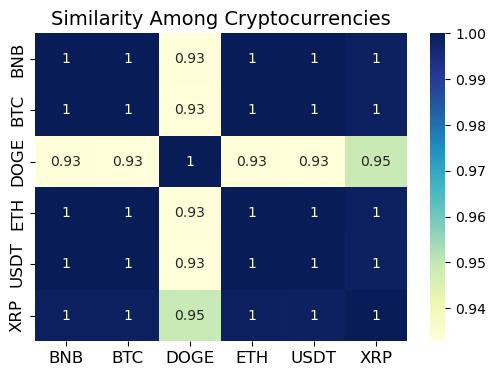

In [75]:
print("Heatmap of Cosine Similarity",end="\n\n")
plt.figure(figsize = (6,4))
sns.heatmap(cosine_sim_matrix, annot=True, cmap='YlGnBu', xticklabels = temp_df['ticker'],
            yticklabels = temp_df['ticker'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("Similarity Among Cryptocurrencies",fontsize=14)
plt.show()

## Principal Component Analysis (PCA)

### Correlation matrix to evaluate PCA results

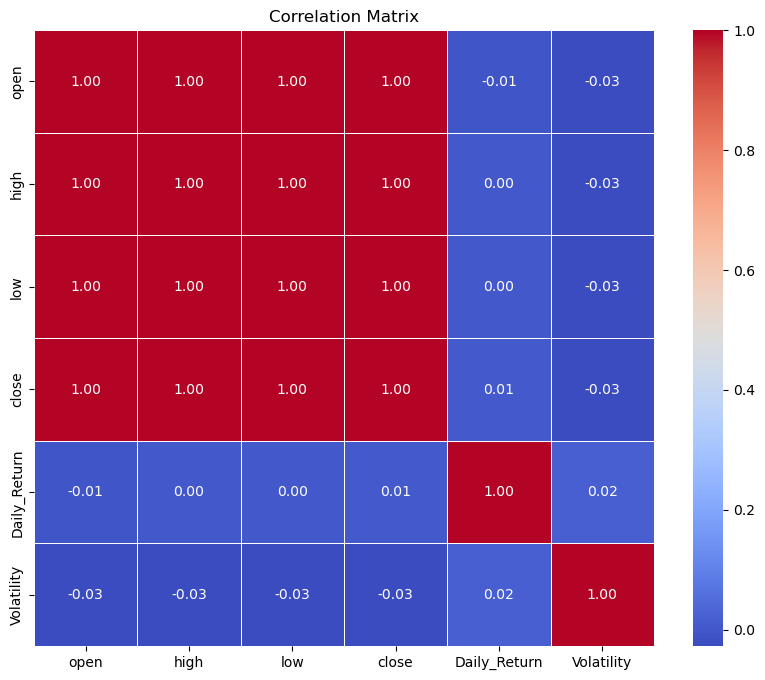

In [87]:
# Select the features for the correlation matrix
correlation_features = clustering_df[columns_to_normalize]

# Calculate the correlation matrix
correlation_matrix = correlation_features.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Scree Plot

In [88]:
# Select the features for PCA
features_for_pca = clustering_df[columns_to_normalize]

In [89]:
# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(features_for_pca)
#pca.fit(features_for_pca)

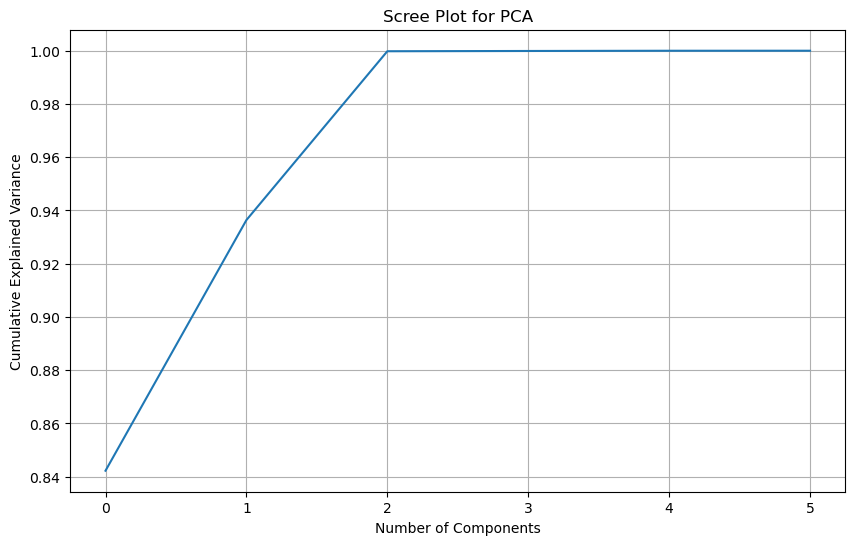

In [90]:
# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot for PCA')
plt.grid(True)
plt.show()

In [91]:
# Apply PCA
pca = PCA(2)
principal_components = pca.fit_transform(features_for_pca)

print(principal_components)

[[-0.82265768  0.51132254]
 [-0.82096223  0.20712648]
 [-0.82206763 -0.66399486]
 ...
 [-0.91392975 -0.67993062]
 [-0.91360913  0.35042785]
 [-0.91364857  0.02007934]]


In [83]:
# Retain the first two components
selected_components = principal_components[:, :2]

# Transform the original data
transformed_data = pca.transform(features_for_pca)[:, :2]

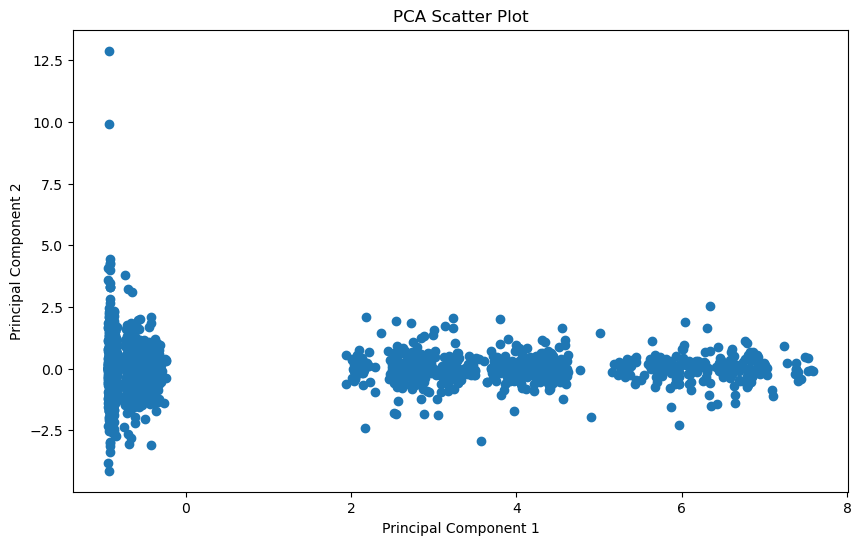

In [92]:
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()

## K-means clustering

### Finding Optimum Clusters for K-means using Elbow Method

In [93]:
# Use the Elbow Method to find the optimal number of clusters
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(principal_components)
    distortions.append(kmeans.inertia_)

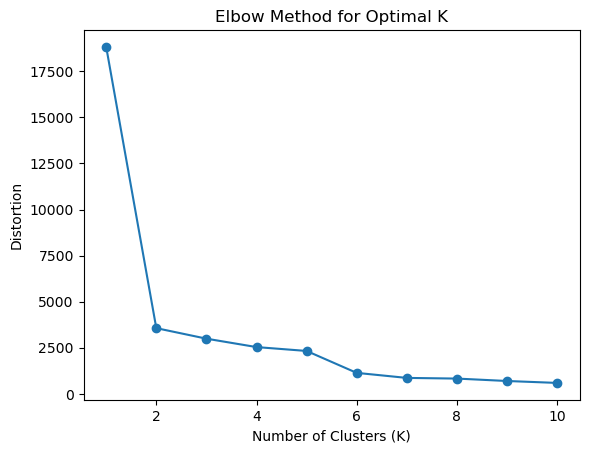

In [94]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.show()

### K means implementation

In [33]:
# Define the number of clusters
num_clusters = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(principal_components)
cluster_labels = kmeans.fit_predict(principal_components)
cluster_centers = kmeans.cluster_centers_


# Evaluating by Silhouette Score
silhouette_avg = silhouette_score(principal_components, cluster_labels)
print("Silhouette Score: ", silhouette_avg, end='\n\n')

# Evaluating by Davies-Bouldin Index
db_score = davies_bouldin_score(principal_components, cluster_labels)
print("Davies-Bouldin Index:", db_score, end='\n\n')

Silhouette Score:  0.8059952981639317

Davies-Bouldin Index: 0.46748837154008555



C:\Users\Varad\AppData\Local\Temp\ipykernel_27972\3799722404.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(principal_components[indices, 0], principal_components[indices, 1], label=f'Cluster {cluster + 1}', s=50, cmap='rainbow')


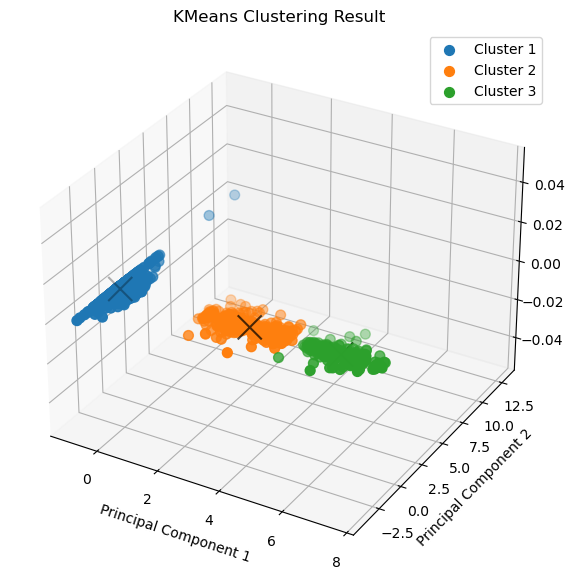

In [34]:
figure = plt.figure(figsize=(12, 7))
ax = figure.add_subplot(111, projection='3d')

for cluster in set(cluster_labels):
    indices = cluster_labels == cluster
    ax.scatter(principal_components[indices, 0], principal_components[indices, 1], label=f'Cluster {cluster + 1}', s=50, cmap='rainbow')
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=300, c='black')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
#ax.set_zlabel('Principal Component 3')
ax.set_title('KMeans Clustering Result')
ax.legend()
plt.show()

## DBSCAN Clustering

### Visualising Principal Component

Text(0, 0.5, 'Principal Component 2')

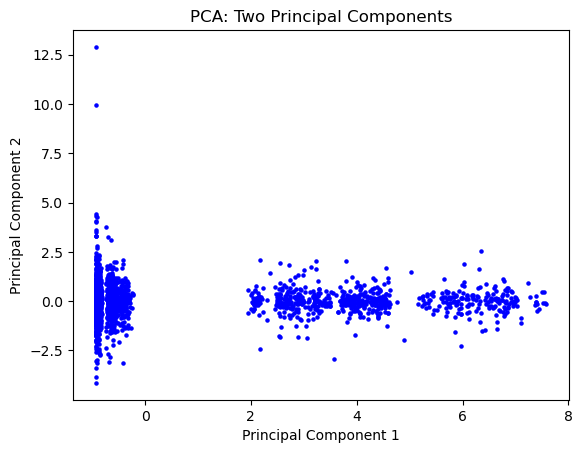

In [35]:
plt.scatter(principal_components[:,0], principal_components[:,1], s=5, c="blue")
plt.title('PCA: Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [36]:
 #Select features for DBSCAN
features_for_dbscan = principal_components

# Choose the value of k for the k-distance plot
k_value = 4

In [37]:
# Fit Nearest Neighbors model
neighbors_model = NearestNeighbors(n_neighbors=k_value + 1)
neighbors_model.fit(features_for_dbscan)
distances, _ = neighbors_model.kneighbors(features_for_dbscan)

In [38]:
# Sort distances
distances = np.sort(distances[:, k_value], axis=0)

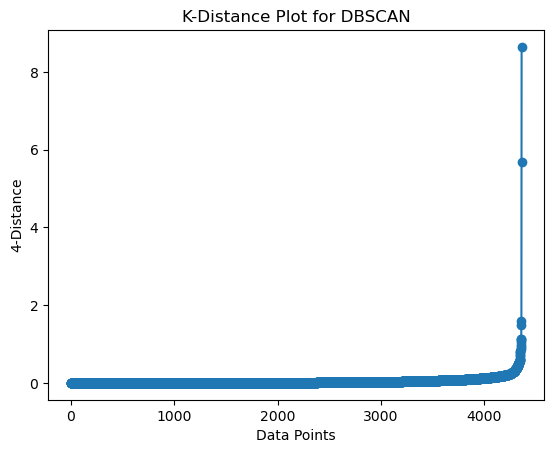

In [39]:
# Plot k-distance graph
plt.plot(range(1, len(distances) + 1), distances, marker='o')
plt.title('K-Distance Plot for DBSCAN')
plt.xlabel('Data Points')
plt.ylabel(f'{k_value}-Distance')
plt.show()

In [40]:
# Apply DBSCAN
eps = [0.4, 0.5, 1.0]
min_sample_values = [5, 10, 15]

for eps_val in eps:
    for val in min_sample_values:
        eps = eps_val
        min_samples = val
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(principal_components)
        silhouette_avg = silhouette_score(principal_components, cluster_labels)
        # Evaluating by Silhouette score
        print(f"Silhouette Score when eps is {eps} and min_samples is {min_samples}: ", silhouette_avg, end='\n\n')
        # Evaluating by Davies-Bouldin Index
        db_score = davies_bouldin_score(principal_components, cluster_labels)
        print("Davies-Bouldin Index:", db_score, end='\n\n')

# dbscan = DBSCAN(eps=0.5, min_samples=)
# cluster_labels = dbscan.fit_predict(principal_components)

Silhouette Score when eps is 0.4 and min_samples is 5:  0.7775832581361237

Davies-Bouldin Index: 4.110473098457229

Silhouette Score when eps is 0.4 and min_samples is 10:  0.801191290478888

Davies-Bouldin Index: 2.1324883925418305

Silhouette Score when eps is 0.4 and min_samples is 15:  0.7963121666012837

Davies-Bouldin Index: 3.3157274168676283

Silhouette Score when eps is 0.5 and min_samples is 5:  0.8129144475167875

Davies-Bouldin Index: 2.910948391195657

Silhouette Score when eps is 0.5 and min_samples is 10:  0.8143302211610062

Davies-Bouldin Index: 1.8022607908342632

Silhouette Score when eps is 0.5 and min_samples is 15:  0.813606622600558

Davies-Bouldin Index: 1.8165115919138275

Silhouette Score when eps is 1.0 and min_samples is 5:  0.829181461178613

Davies-Bouldin Index: 1.057850783034498

Silhouette Score when eps is 1.0 and min_samples is 10:  0.829181461178613

Davies-Bouldin Index: 1.057850783034498

Silhouette Score when eps is 1.0 and min_samples is 15:  0.

In [41]:
eps = 1.0
min_samples = 5

dbscan = DBSCAN(eps=1.0, min_samples=5)
cluster_labels = dbscan.fit_predict(principal_components)

# Evaluating by Silhouette score
print(f"Silhouette Score when eps is {eps} and min_samples is {min_samples}: ", silhouette_avg, end='\n\n')
# Evaluating by Davies-Bouldin Index
db_score = davies_bouldin_score(principal_components, cluster_labels)
print("Davies-Bouldin Index:", db_score, end='\n\n')

Silhouette Score when eps is 1.0 and min_samples is 5:  0.8288152944247944

Davies-Bouldin Index: 1.057850783034498



In [42]:
# Reset the index of the clustering_df DataFrame
clustering_df.reset_index(drop=True, inplace=True)

In [43]:
dbscluster = clustering_df[columns_to_normalize]

# Assign cluster labels to the clustering_df DataFrame
dbscluster['Cluster'] = cluster_labels

# Calculate cluster statistics
cluster_stats = dbscluster.groupby('Cluster').mean().reset_index()
print("Cluster Statistics:")
print(cluster_stats)

Cluster Statistics:
   Cluster      open      high       low     close  Daily_Return  Volatility
0       -1  0.425247  0.407830  0.301708  0.296390      6.522964    1.405576
1        0 -0.350749 -0.350726 -0.351050 -0.350943     -0.048447   -0.213448
2        1  2.157149  2.144687  2.176134  2.155768     -0.035235   -0.262388


C:\Users\Varad\AppData\Local\Temp\ipykernel_27972\1458274473.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscluster['Cluster'] = cluster_labels


In [44]:
dbscluster.head(1000)

,open,high,low,close,Daily_Return,Volatility,Cluster
0,-0.344193,-0.343866,-0.343351,-0.343098,0.467735,-0.164813,0
1,-0.342926,-0.343298,-0.342657,-0.342570,0.164565,-0.194682,0
2,-0.342398,-0.343395,-0.343416,-0.344256,-0.706931,-0.207115,0
3,-0.344103,-0.344512,-0.344157,-0.344489,-0.139657,-0.210493,0
4,-0.344327,-0.344875,-0.348264,-0.347555,-1.299748,-0.222002,0
...,...,...,...,...,...,...,...
995,1.286609,1.296478,1.323956,1.317403,0.305186,-0.141105,1
996,1.318629,1.389373,1.340855,1.308131,-0.146277,-0.141144,1
997,1.308331,1.336221,1.309126,1.364113,0.570220,-0.127451,1
998,1.365231,1.326680,1.343385,1.347482,-0.221860,-0.129711,1


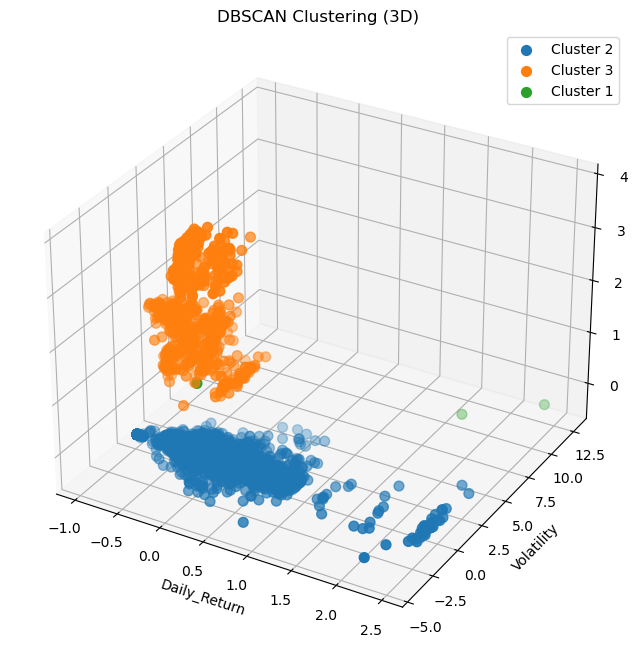

In [45]:
# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Iterate through unique clusters
for cluster in set(cluster_labels):
    indices = dbscluster['Cluster'] == cluster
    ax.scatter(dbscluster.loc[indices, 'Volatility'], dbscluster.loc[indices, 'Daily_Return'], dbscluster.loc[indices, 'close'], label=f'Cluster {cluster + 2}', s=50)

ax.set_xlabel('Daily_Return')
ax.set_ylabel('Volatility')
ax.set_zlabel('close')
ax.set_title('DBSCAN Clustering (3D)')
ax.legend()
plt.show()

## Classification

### Decision Tree

In [14]:
#Date type conversion
classification_df['date'] = pd.to_datetime(classification_df['date'])

# Extract year, month, day from datetime column
# classification_df['year'] = classification_df['date'].dt.year
# classification_df['month'] = classification_df['date'].dt.month
# classification_df['day'] = classification_df['date'].dt.day

year = [2022, 2023]
classification_df = classification_df[classification_df['date'].dt.year.isin(year)]

In [15]:
classification_df = classification_df.drop('date', axis=1)
#classification_df = classification_df.drop('ticker', axis=1)

In [16]:
classification_df

,ticker,open,high,low,close,Daily_Return,Volatility,volatility_category_numeric
1096,1,-0.344193,-0.343866,-0.343351,-0.343098,0.467735,-0.164813,1
1097,1,-0.342926,-0.343298,-0.342657,-0.342570,0.164565,-0.194682,1
1098,1,-0.342398,-0.343395,-0.343416,-0.344256,-0.706931,-0.207115,1
1099,1,-0.344103,-0.344512,-0.344157,-0.344489,-0.139657,-0.210493,1
1100,1,-0.344327,-0.344875,-0.348264,-0.347555,-1.299748,-0.222002,1
...,...,...,...,...,...,...,...,...
10930,6,-0.389903,-0.389848,-0.390283,-0.390040,-0.319130,-0.482760,1
10931,6,-0.389903,-0.389847,-0.390283,-0.390037,0.967667,-0.417768,1
10932,6,-0.389900,-0.389847,-0.390283,-0.390039,-0.714580,-0.390244,1
10933,6,-0.389903,-0.389847,-0.390282,-0.390038,0.317431,-0.401707,1


In [17]:
# Feature and target variables
X = classification_df.drop('volatility_category_numeric', axis=1)
y = classification_df['volatility_category_numeric']

In [18]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.9977064220183486

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       577
           2       1.00      1.00      1.00       291
           3       1.00      1.00      1.00         4

    accuracy                           1.00       872
   macro avg       1.00      1.00      1.00       872
weighted avg       1.00      1.00      1.00       872



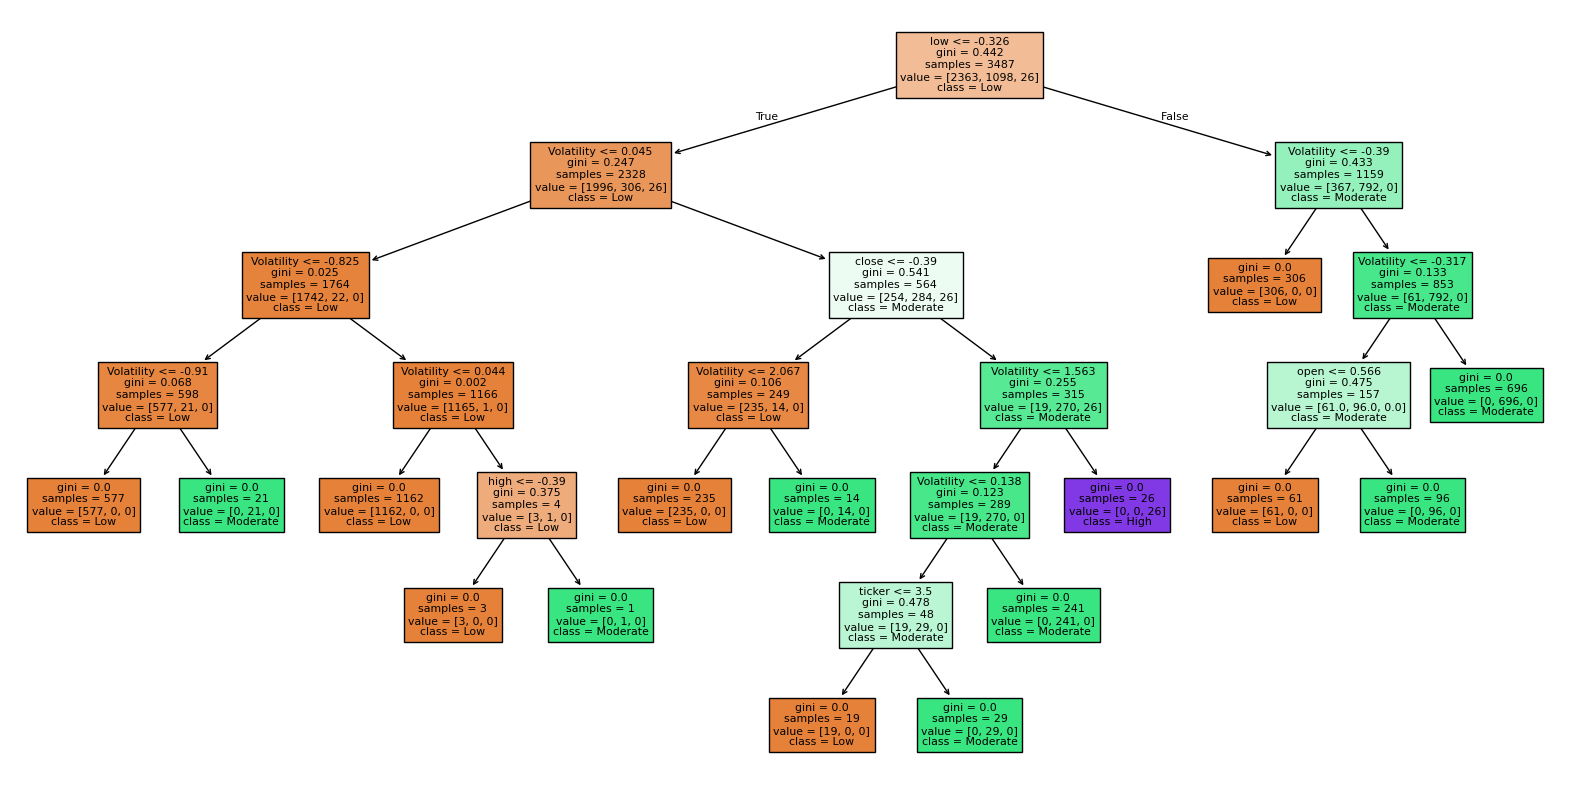

In [19]:
# Predictions
y_pred = dtree.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualization of the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=X.columns.tolist(), class_names=['Low', 'Moderate', 'High'])
plt.show()

In [20]:
X_train.shape[1]

7

In [21]:
# Prepare the new sample data
new_sample_data = np.array([-0.39, -0.21, -0.32, -0.12, -0.28, -0.11, -0.19]).reshape(1, -1)

# Predict the class labels for the new sample data
new_sample_predictions = dtree.predict(new_sample_data)

# Print the predicted class labels
print("Predicted Class Labels:", new_sample_predictions)

Predicted Class Labels: [2]


C:\Conda5\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## KNN Classification

In [25]:
classification_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4359 entries, 1096 to 10934
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ticker                       4359 non-null   int64  
 1   open                         4359 non-null   float64
 2   high                         4359 non-null   float64
 3   low                          4359 non-null   float64
 4   close                        4359 non-null   float64
 5   Daily_Return                 4359 non-null   float64
 6   Volatility                   4359 non-null   float64
 7   volatility_category_numeric  4359 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 306.5 KB


In [26]:
classification_df.head()

,ticker,open,high,low,close,Daily_Return,Volatility,volatility_category_numeric
1096,1,-0.344193,-0.343866,-0.343351,-0.343098,0.467735,-0.164813,1
1097,1,-0.342926,-0.343298,-0.342657,-0.342570,0.164565,-0.194682,1
1098,1,-0.342398,-0.343395,-0.343416,-0.344256,-0.706931,-0.207115,1
1099,1,-0.344103,-0.344512,-0.344157,-0.344489,-0.139657,-0.210493,1
1100,1,-0.344327,-0.344875,-0.348264,-0.347555,-1.299748,-0.222002,1


In [27]:
# Feature and target variables
X = classification_df.drop('volatility_category_numeric', axis=1)
y = classification_df['volatility_category_numeric']

In [28]:
classification_df['volatility_category_numeric'].value_counts()

1    2940
2    1389
3      30
Name: volatility_category_numeric, dtype: int64

In [29]:
y_bin = label_binarize(y, classes=[0, 1, 2])

In [30]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Create KNN classifier
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Predict on the test data
#predictions = knn.predict_proba(X_test)
predictions_mat = knn.predict(X_test)

#y_scores = knn.predict_proba(X_test)


Accuracy: 0.9717125382262997
Precision: 0.9716728838168527
Recall: 0.9717125382262997
F1 Score: 0.9716869103840297


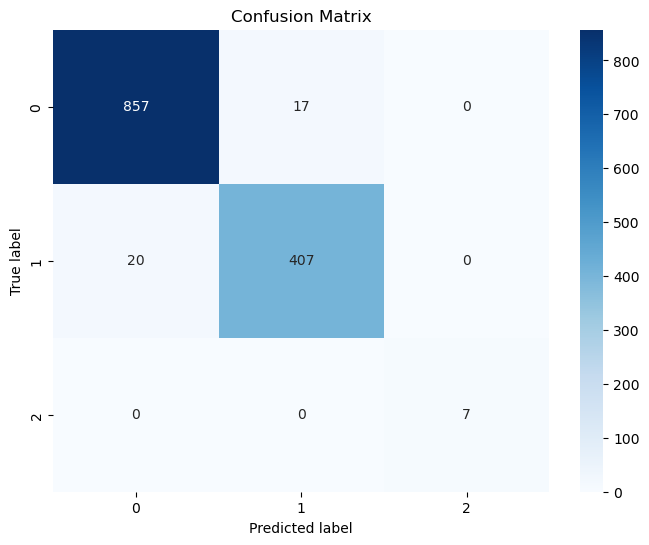

In [32]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_mat)
precision = precision_score(y_test, predictions_mat, average='weighted')
recall = recall_score(y_test, predictions_mat, average='weighted')
f1 = f1_score(y_test, predictions_mat, average='weighted')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion Matrix
cm = confusion_matrix(y_test, predictions_mat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [33]:
print("\nClassification Report:\n", classification_report(y_test, predictions_mat))


Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.98      0.98       874
           2       0.96      0.95      0.96       427
           3       1.00      1.00      1.00         7

    accuracy                           0.97      1308
   macro avg       0.98      0.98      0.98      1308
weighted avg       0.97      0.97      0.97      1308



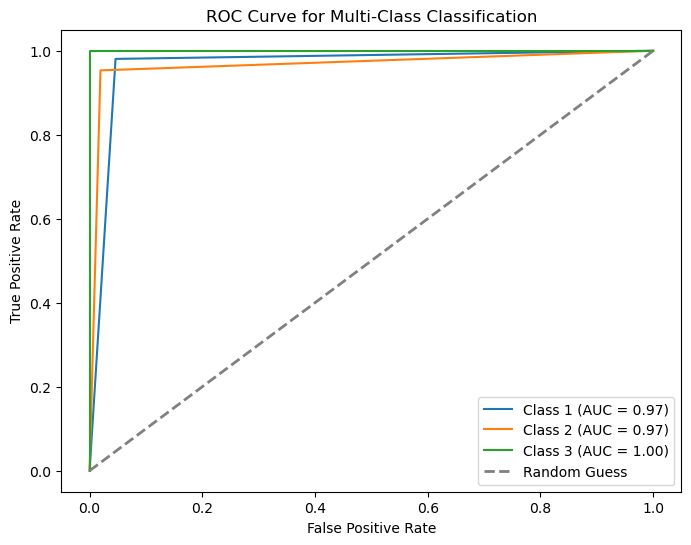

In [34]:
# Convert y_test and predictions to one-hot encoded format
y_test_onehot = label_binarize(y_test, classes=[1, 2, 3])
predictions_onehot = label_binarize(predictions_mat, classes=[1, 2, 3])

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], predictions_onehot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))

for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()

In [35]:
y_test

4797     1
6616     2
1739     1
6730     2
10493    2
        ..
5249     1
6970     2
8416     1
8599     1
10683    2
Name: volatility_category_numeric, Length: 1308, dtype: int64

In [36]:
# New data prediction function
def predict_new_data(new_data, new_data1):
    prediction_numeric = knn.predict([new_data])
    prediction_numeric1 = knn.predict([new_data1])
    return prediction_numeric, prediction_numeric1

# Example new data
new_data = [0.075322244, 0.074716745, 0.070873903, 0.070200108, 0.061405636, 0.058823039, 0.058426783]
new_data1 = [2.1, 1.3, 3.2, 1.1, 5.6, 4.5, 2.5]

# Predict class for new data
predicted_class, predicted_class1 = predict_new_data(new_data, new_data1)
print(f'Predicted Class for Data Sample {new_data}: {predicted_class}')
print(f'Predicted Class for Data Sample_1 {new_data1}: {predicted_class1}')

Predicted Class for Data Sample [0.075322244, 0.074716745, 0.070873903, 0.070200108, 0.061405636, 0.058823039, 0.058426783]: [1]
Predicted Class for Data Sample_1 [2.1, 1.3, 3.2, 1.1, 5.6, 4.5, 2.5]: [2]


C:\Conda5\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Conda5\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Conda5\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Conda5\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Conda5\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Conda5\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with featu

## Regression

In [37]:
#Date type conversion
regression_df['date'] = pd.to_datetime(regression_df['date'])

# Extract year, month, day from datetime column
# classification_df['year'] = classification_df['date'].dt.year
# classification_df['month'] = classification_df['date'].dt.month
# classification_df['day'] = classification_df['date'].dt.day

year = [2022, 2023]
regression_df = regression_df[regression_df['date'].dt.year.isin(year)]

In [39]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4359 entries, 1096 to 10934
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ticker                       4359 non-null   int64         
 1   date                         4359 non-null   datetime64[ns]
 2   open                         4359 non-null   float64       
 3   high                         4359 non-null   float64       
 4   low                          4359 non-null   float64       
 5   close                        4359 non-null   float64       
 6   Daily_Return                 4359 non-null   float64       
 7   Volatility                   4359 non-null   float64       
 8   volatility_category_numeric  4359 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 340.5 KB


In [43]:
regression_df = regression_df.drop('date', axis=1)

In [44]:
regression_df.head()

,ticker,open,high,low,close,Daily_Return,Volatility,volatility_category_numeric
1096,1,-0.344193,-0.343866,-0.343351,-0.343098,0.467735,-0.164813,1
1097,1,-0.342926,-0.343298,-0.342657,-0.342570,0.164565,-0.194682,1
1098,1,-0.342398,-0.343395,-0.343416,-0.344256,-0.706931,-0.207115,1
1099,1,-0.344103,-0.344512,-0.344157,-0.344489,-0.139657,-0.210493,1
1100,1,-0.344327,-0.344875,-0.348264,-0.347555,-1.299748,-0.222002,1


In [45]:
regression_df['close'].values


array([-0.34309781, -0.34257017, -0.34425609, ..., -0.39003908,
       -0.39003801, -0.39003791])

In [46]:
X = regression_df.drop(['close'], axis=1)
y = regression_df['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train = X_train
# X_test = X_test
# X_train = np.asarray(X_train).astype(np.float32)
# X_test = np.asarray(X_test).astype(np.float32)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [47]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.00013172774249230643
R^2 Score: 0.9998790986087935
Mean Absolute Error: 0.004245327728156262


In [48]:
mae = mean_absolute_error(y_test, y_pred)

In [49]:
print(mae)

0.004245327728156262


Linear Regression Graph: Closing Prices



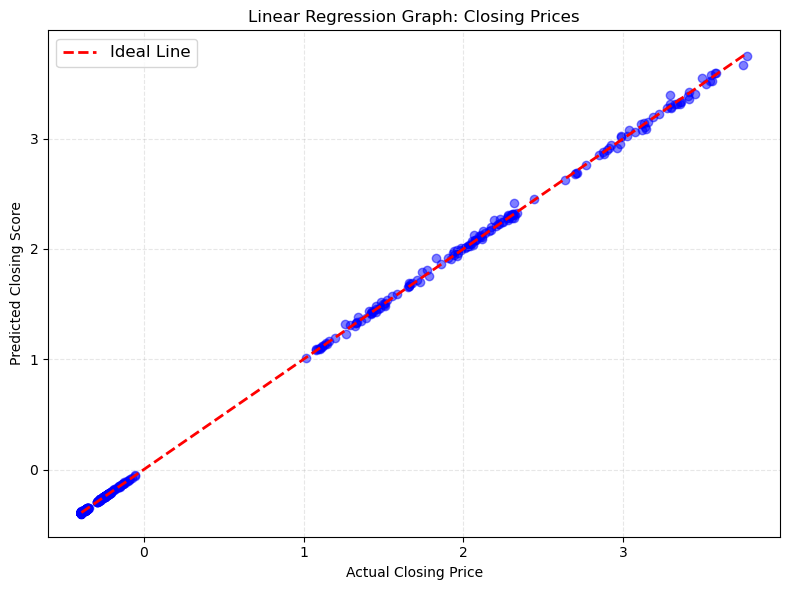

In [52]:
print("Linear Regression Graph: Closing Prices", end="\n\n")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Add transparency (alpha) for better visibility
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Linear Regression Graph: Closing Prices', fontsize=12)
plt.xlabel('Actual Closing Price', fontsize=10)
plt.ylabel('Predicted Closing Score', fontsize=10)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)  # Add grid lines with transparency (alpha)
plt.tick_params(axis='both', which='major', labelsize=10)  # Increase tick label font size
plt.tight_layout()  # Improve spacing between subplots
plt.show()

In [53]:
new_data = [[16.64, 18.31, 18.33, 18.33, 18.15, 18.26, 18.49]]
prediction = model.predict(new_data)
print(f"Prediction for new data: {prediction[0]}")

Prediction for new data: 18.354485515975608


C:\Conda5\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
